<a href="https://colab.research.google.com/github/anisafitriani1122/Proyek-Tugas-Besar_Pembelajaran-Mesin/blob/main/Kelompok_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python Coding untuk Clustering
SEMESTER GENAP TA 2023/2024

Dosen Pengampu: Triyana Muliawati, S.Si., M.Si.

1. Jova Edri Saputra 121160021
2. Mira Amalia 121160032
3. Anisa Fitriani 121160035
4. Intan Permatasari H. 121160083

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# mengimpor dataset
dataset = pd.read_csv('/content/sample_data/Padi Lampung.csv')
dataset

,Wilayah,Luas Panen (Ha),Produksi (Ton),Produktivitas (Ku/Ha)
0,Bandar Lampung,491.63,2721.97,55.37
1,Metro,5323.92,29297.35,55.03
2,Tulang Bawang Barat,10254.68,50700.33,49.44
3,Pesisir Barat,11921.43,60772.93,50.98
4,Lampung Barat,13032.88,62802.09,48.19
5,Lampung Utara,13705.47,63452.76,46.30
6,Way Kanan,21224.06,100985.27,47.58
7,Tanggamus,22563.40,128674.92,57.03
8,Pesawaran,23359.64,130558.89,55.89
9,Pringsewu,23489.05,137096.53,58.37


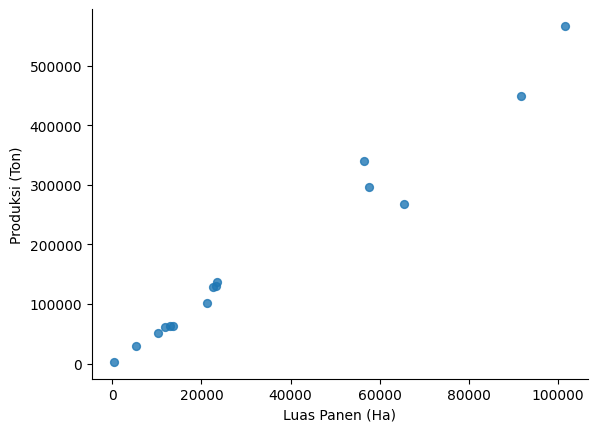

In [ ]:
# @title Luas Panen (Ha) vs Produksi (Ton)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Luas Panen (Ha)', y='Produksi (Ton)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = dataset.iloc[:, [1,2]].values
print(dataset)
print(X)

                Wilayah  Luas Panen (Ha)  Produksi (Ton)  \
0        Bandar Lampung           491.63         2721.97   
1                 Metro          5323.92        29297.35   
2   Tulang Bawang Barat         10254.68        50700.33   
3         Pesisir Barat         11921.43        60772.93   
4         Lampung Barat         13032.88        62802.09   
5         Lampung Utara         13705.47        63452.76   
6             Way Kanan         21224.06       100985.27   
7             Tanggamus         22563.40       128674.92   
8             Pesawaran         23359.64       130558.89   
9             Pringsewu         23489.05       137096.53   
10      Lampung Selatan         56393.41       339941.87   
11               Mesuji         57654.90       296934.72   
12        Tulang Bawang         65510.84       268323.74   
13        Lampung Timur         91718.06       449294.90   
14       Lampung Tengah        101612.69       566601.47   

    Produktivitas (Ku/Ha)  
0          

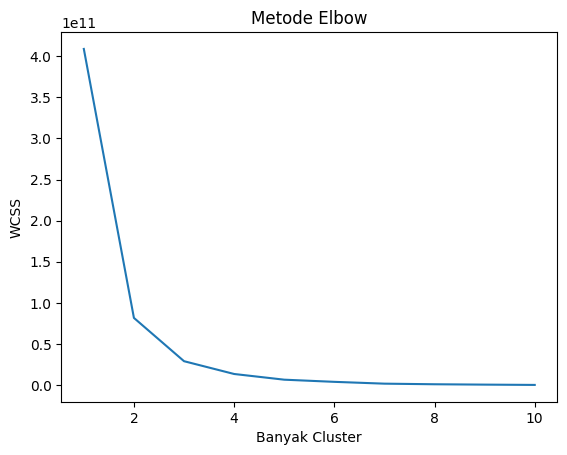

[408898822529.20123, 81668046859.47527, 29012446516.40844, 13453209056.969343, 6523841522.96845, 3894001446.154242, 1686221980.2467742, 956909528.6193578, 516757543.6973584, 151956619.30310833]


In [ ]:
# menggunakan metode elbow untuk menentukan cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Banyak Cluster')
plt.ylabel('WCSS')
plt.show()
print(wcss)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.7093588424601047
For n_clusters = 3 The average silhouette_score is : 0.7018785503741519
For n_clusters = 4 The average silhouette_score is : 0.6534537772499719
For n_clusters = 5 The average silhouette_score is : 0.5882607674079973
For n_clusters = 6 The average silhouette_score is : 0.5731383841116942
For n_clusters = 7 The average silhouette_score is : 0.5046415087277809
For n_clusters = 8 The average silhouette_score is : 0.44467813270074147


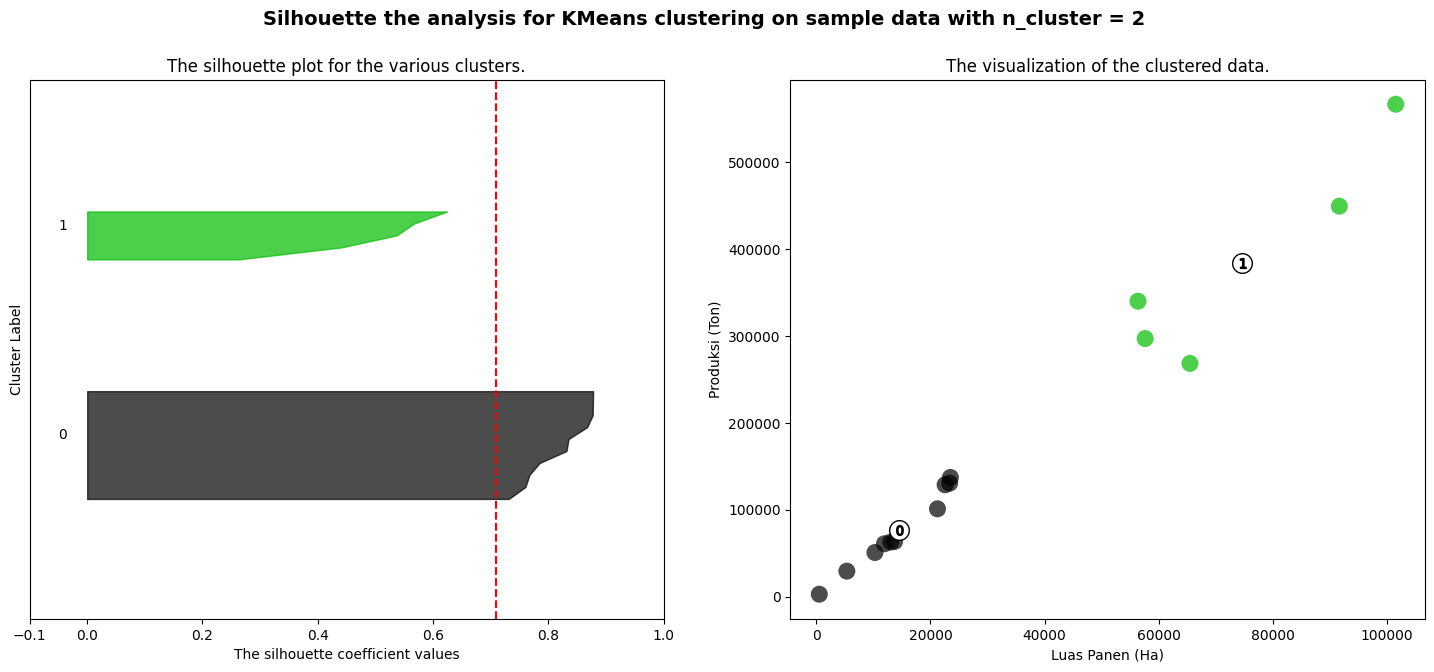

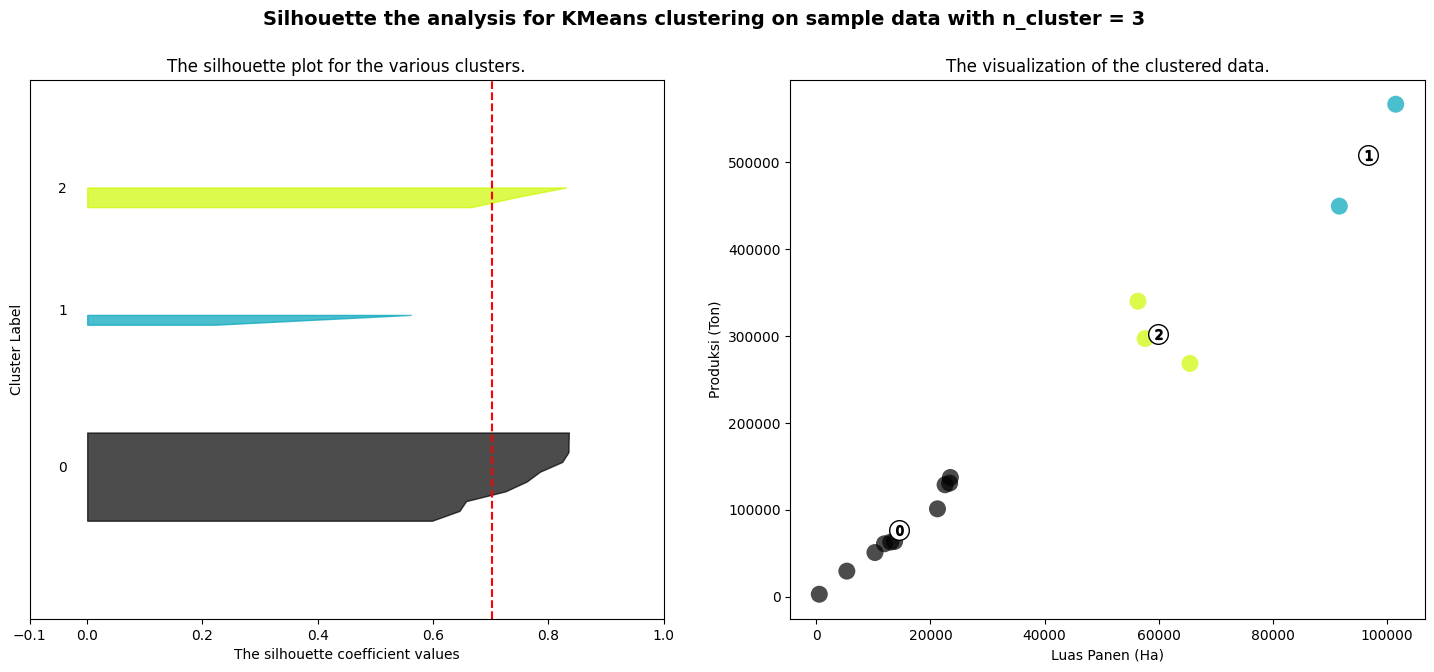

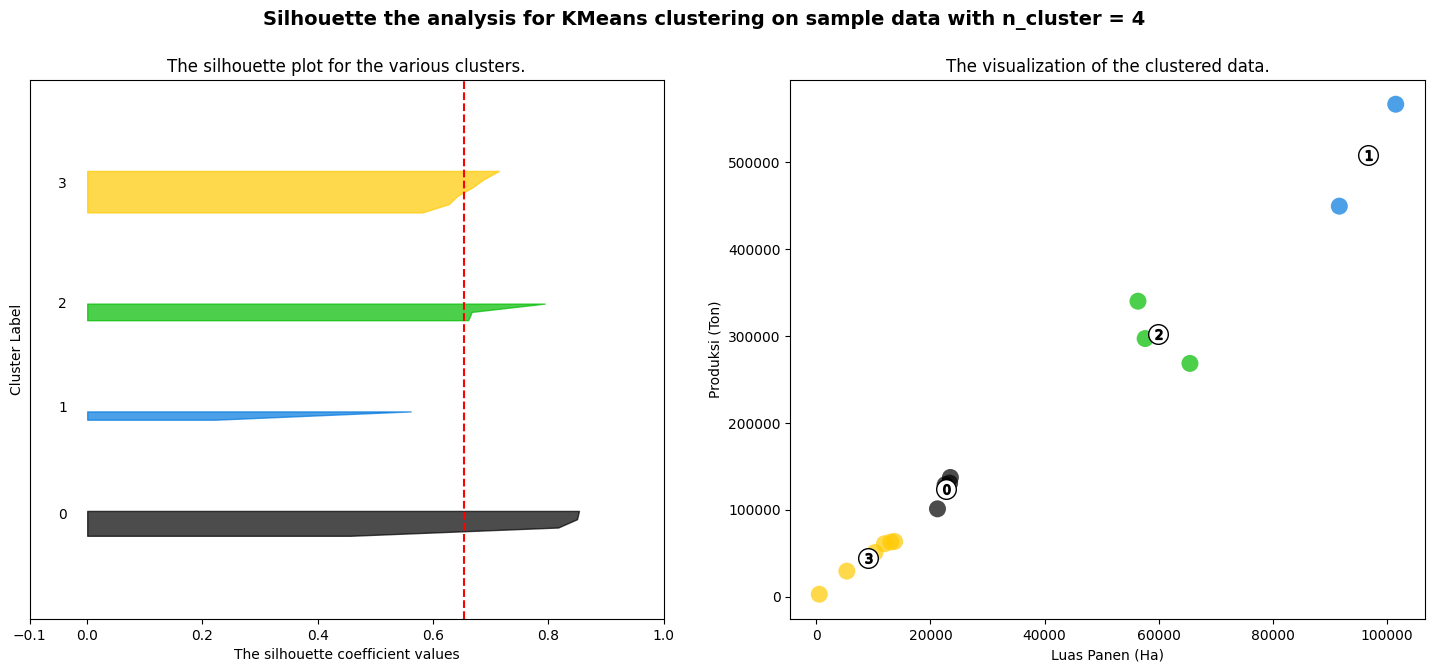

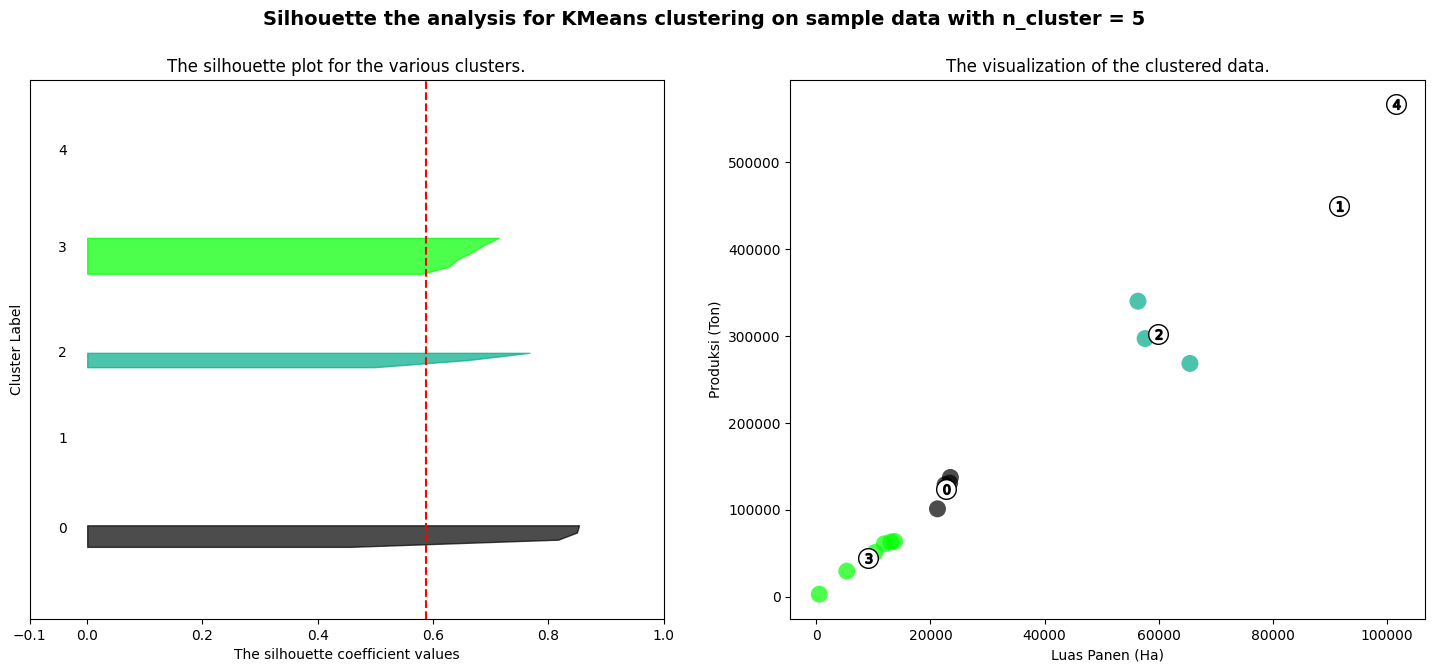

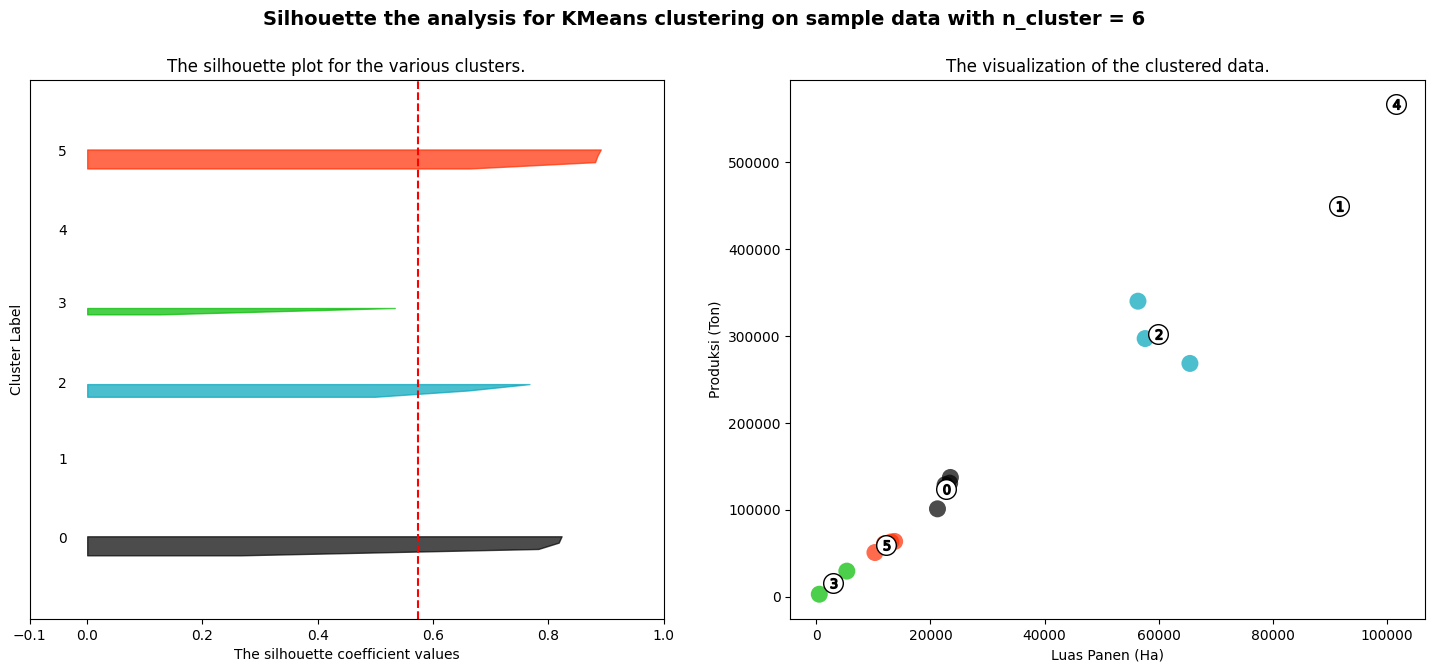

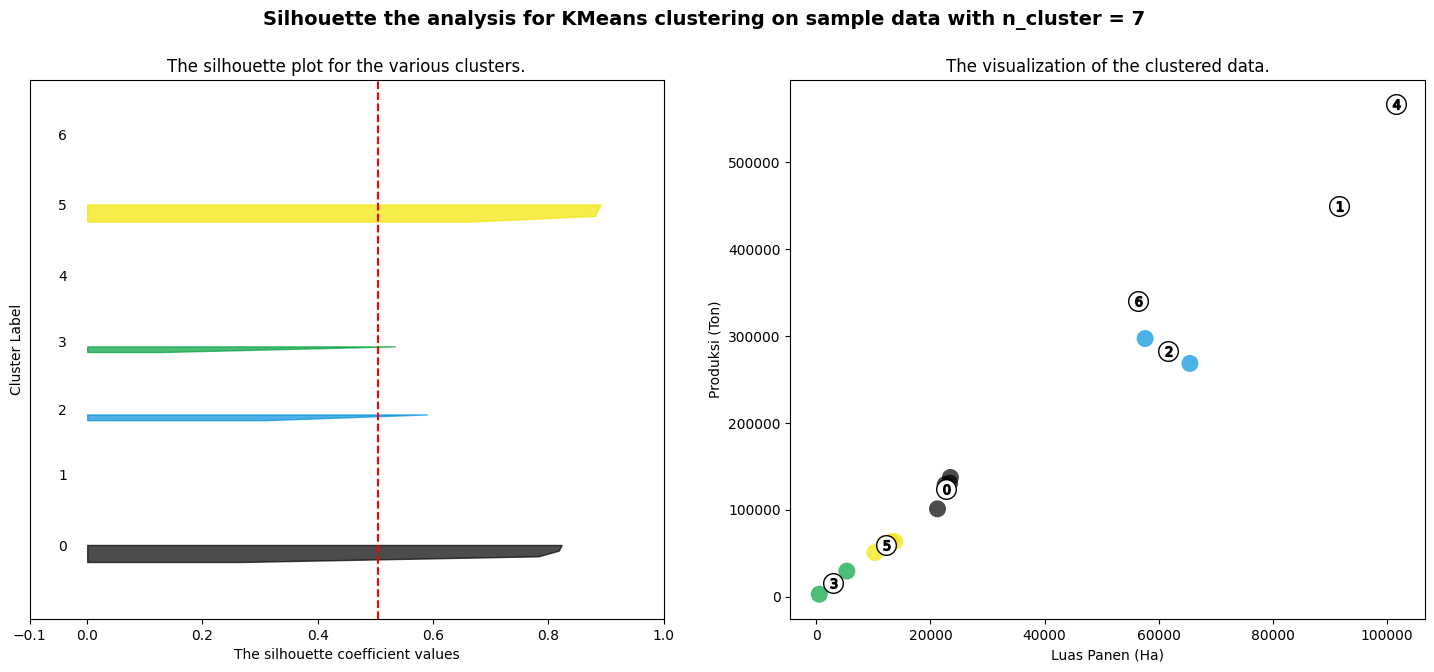

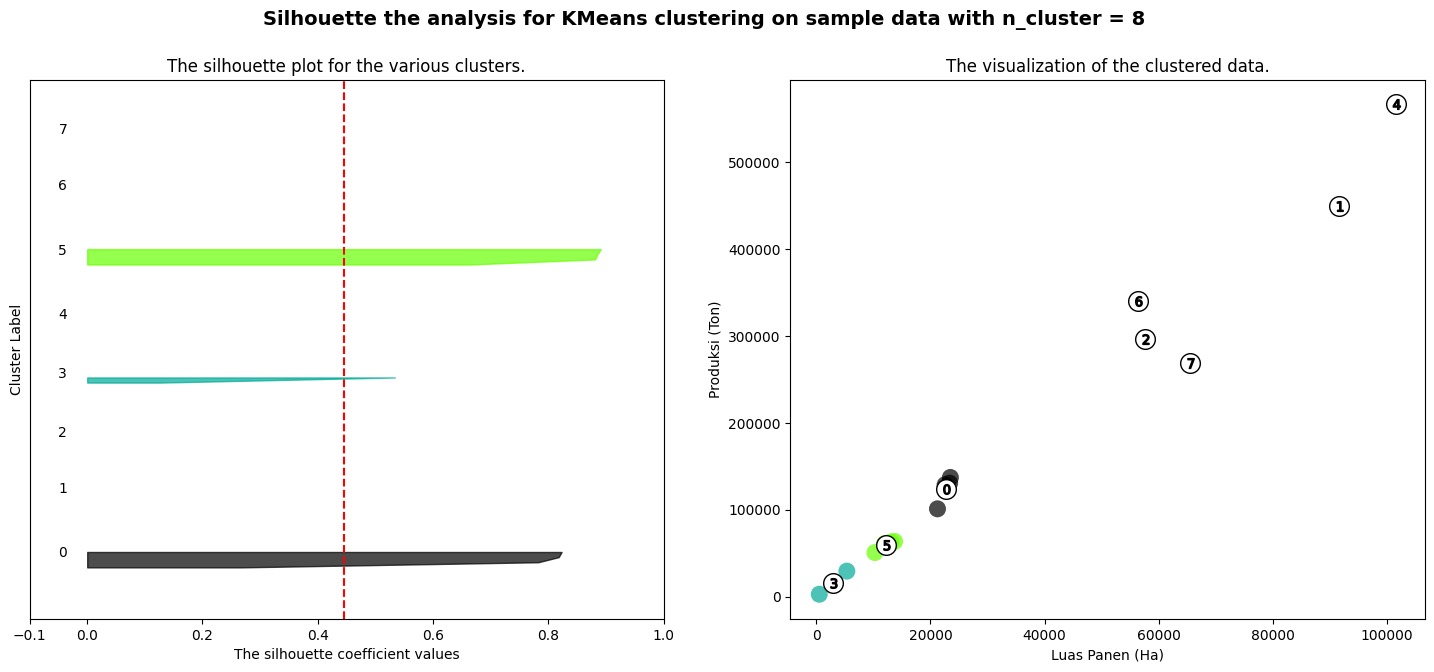

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig,(ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # the 1st sub plot is the silhouette plot
    # the silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # the (n_clusters+1)*10 is for inserting space between silhouette
    # plot of individual clusters, to demarcate them clearly
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # the silhouette_score gives the average value for all the samples.
    # this gives a prespective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # compute the silhouette scores for each example
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for the next plot
        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster Label")

    # the vertical line for average silhouette score of al the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) # clear the yaxis label / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters found
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker="o", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # labeling the cluster
    centers = clusterer.cluster_centers_
    # draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k"
    )

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Luas Panen (Ha)")
    ax2.set_ylabel("Produksi (Ton)")

    plt.suptitle(
        "Silhouette the analysis for KMeans clustering on sample data with n_cluster = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

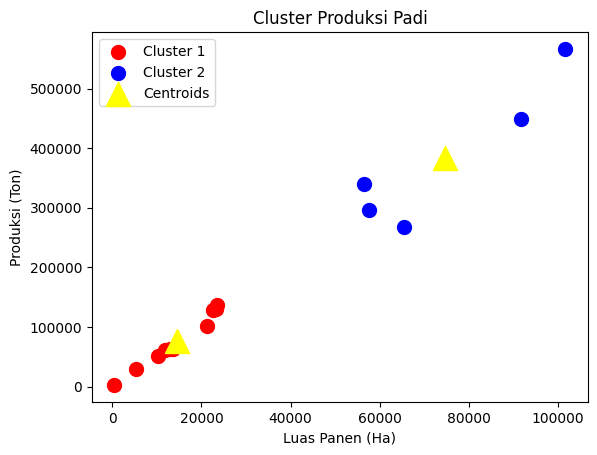

In [ ]:
# visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', s = 300, c='yellow', label = 'Centroids')
plt.title('Cluster Produksi Padi')
plt.xlabel('Luas Panen (Ha)')
plt.ylabel('Produksi (Ton)')
plt.legend()
plt.show()